In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

print('Libraries imported successfully!')

Libraries imported successfully!


In [5]:
train_path = "/kaggle/input/ai-201-b-mse-2-aiml-c/train.csv"
test_path = "/kaggle/input/ai-201-b-mse-2-aiml-c/test.csv"
target_col = "NObeyesdad"
id_col = "id"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (18306, 17)
Test Shape: (4152, 17)


In [6]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,33.226808,1.766888,83.337721,yes,NaN,2.0,NaN,Sometimes,no,1.964435,no,0.750111,0.0,no,Automobile,Overweight_Level_II
1,Female,18.000000,1.600000,55.000000,yes,yes,2.0,3.000000,Sometimes,no,2.000000,no,1.000000,1.0,Sometimes,Public_Transportation,Normal_Weight
2,NaN,26.000000,1.640741,111.930700,yes,yes,3.0,3.000000,Sometimes,no,2.617988,no,0.000000,NaN,Sometimes,Public_Transportation,Obesity_Type_III
3,Male,19.000000,1.690000,64.000000,no,yes,2.0,NaN,Frequently,no,2.000000,no,0.000000,1.0,Sometimes,Automobile,Normal_Weight
4,Male,NaN,1.606474,94.189167,yes,yes,2.0,2.812283,Sometimes,no,2.000000,no,1.000000,0.0,no,NaN,Obesity_Type_I


In [7]:
y = train[target_col]
X = train.drop(columns=[target_col])
test_ids = test[id_col]

cat_cols = [col for col in X.columns if X[col].dtype == "object"]
num_cols = [col for col in X.columns if X[col].dtype != "object"]

cat_cols, num_cols

(['Gender',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SMOKE',
  'SCC',
  'CALC',
  'MTRANS'],
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

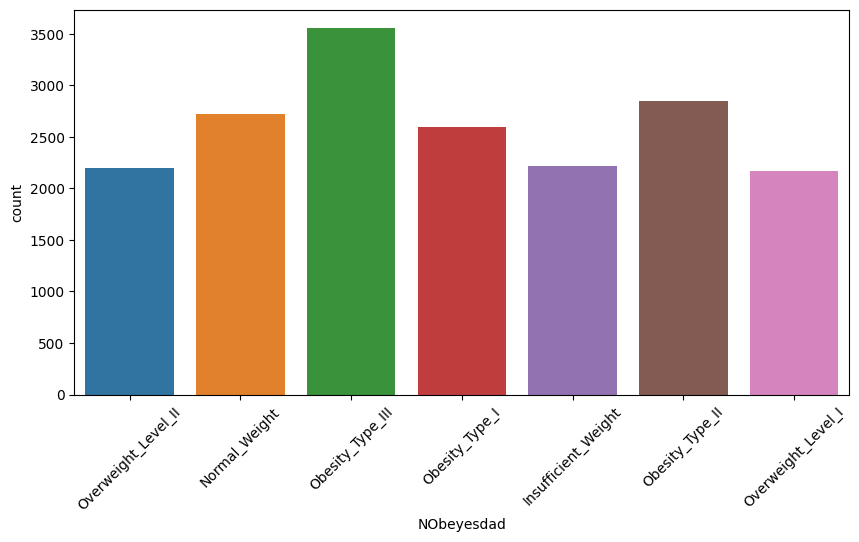

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


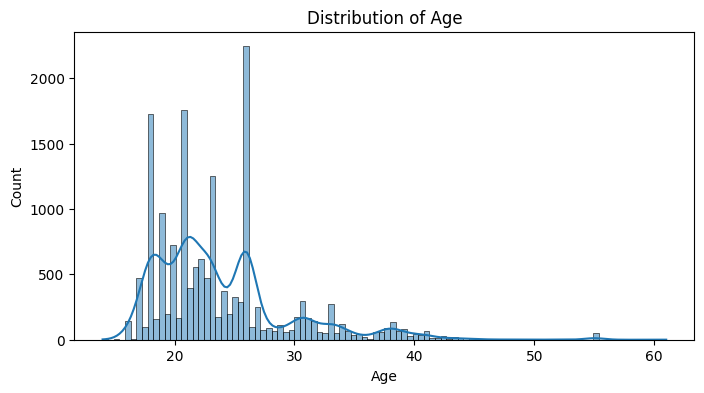

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


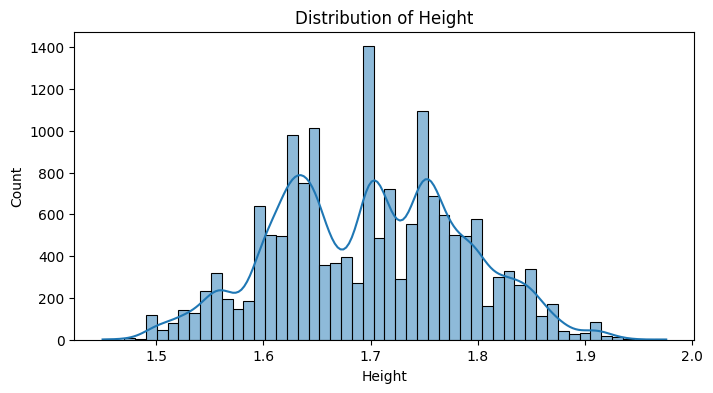

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


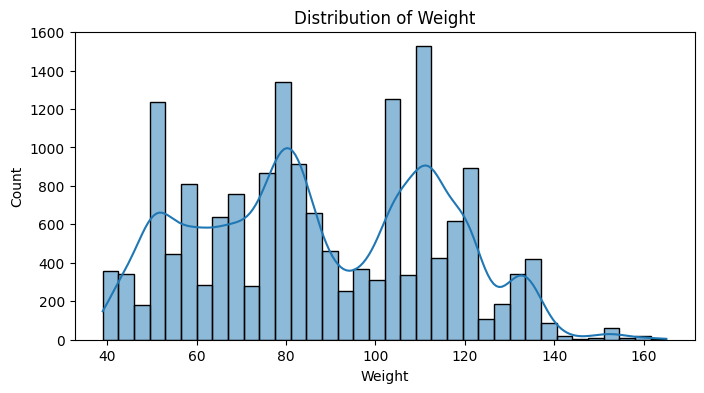

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


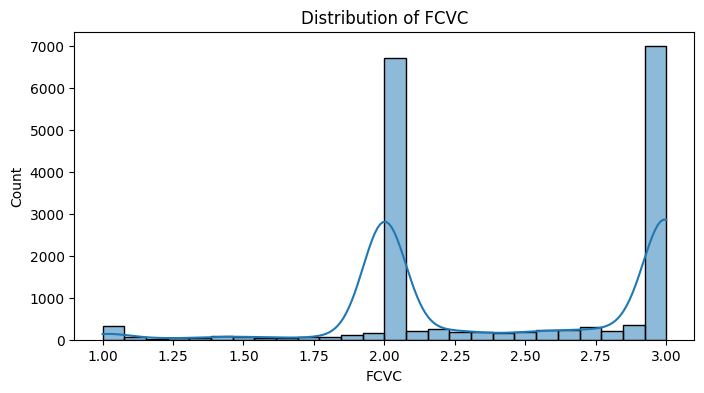

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


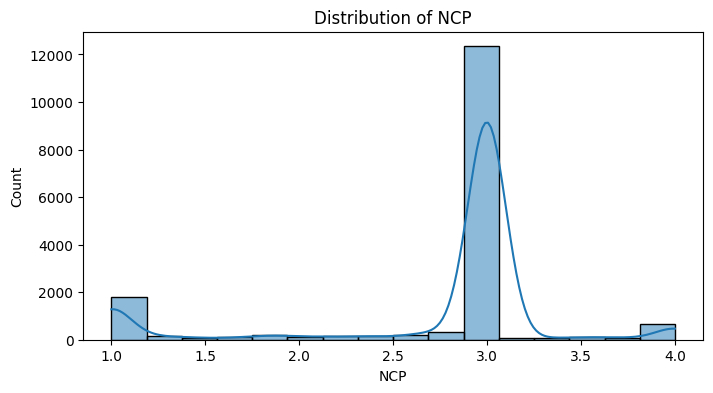

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


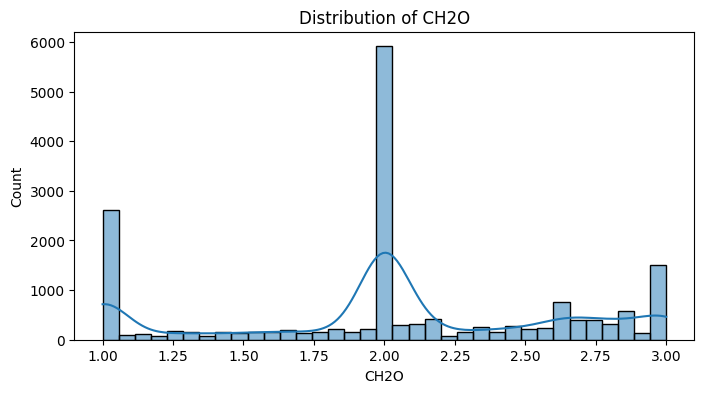

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


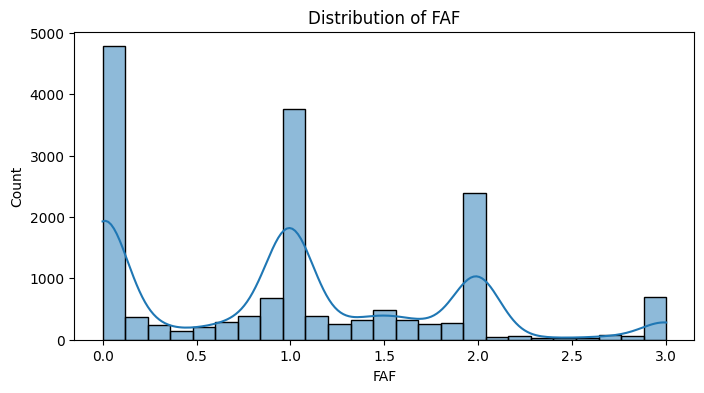

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


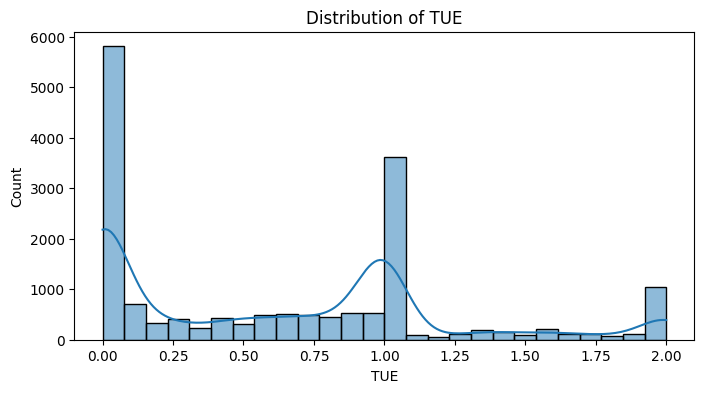

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x=target_col)
plt.xticks(rotation=45)
plt.show()

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

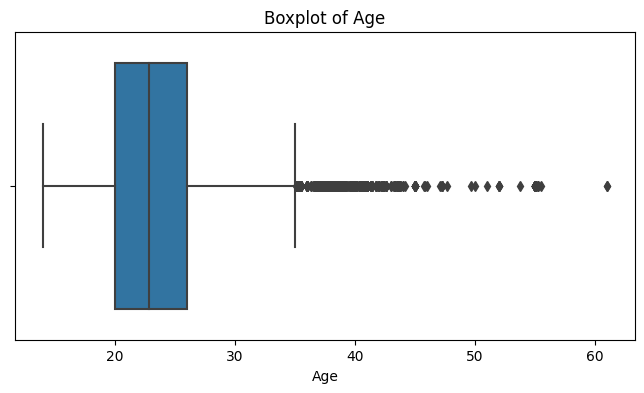

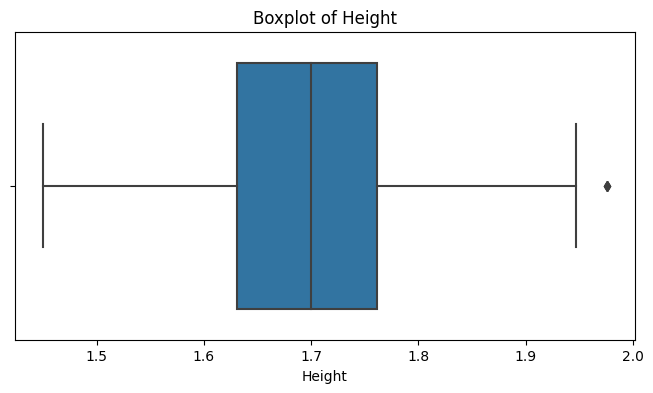

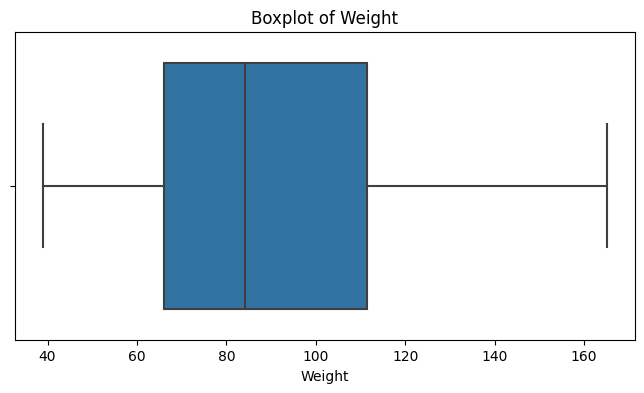

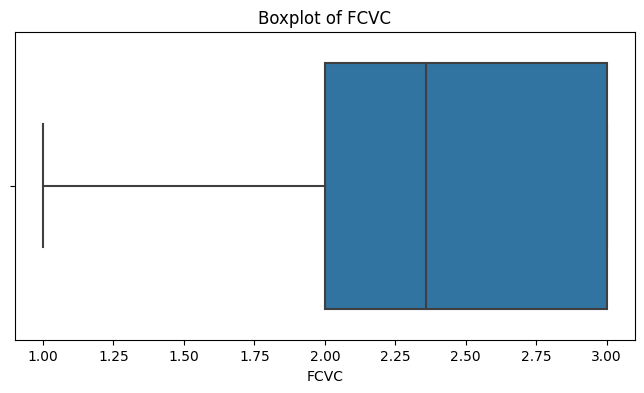

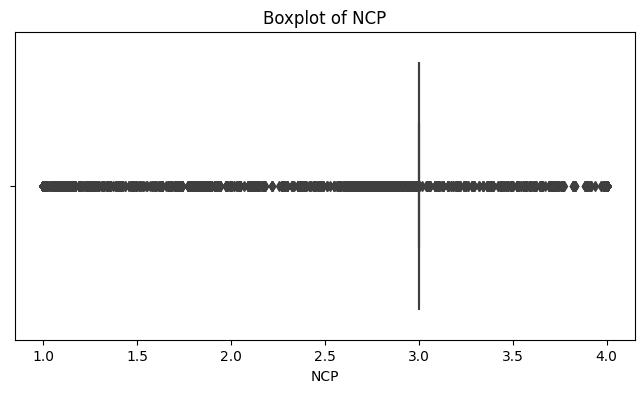

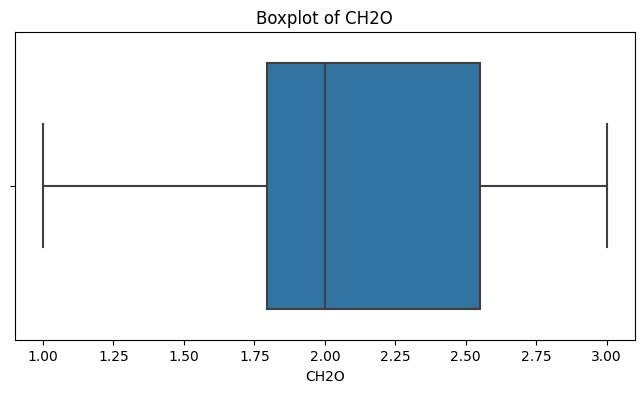

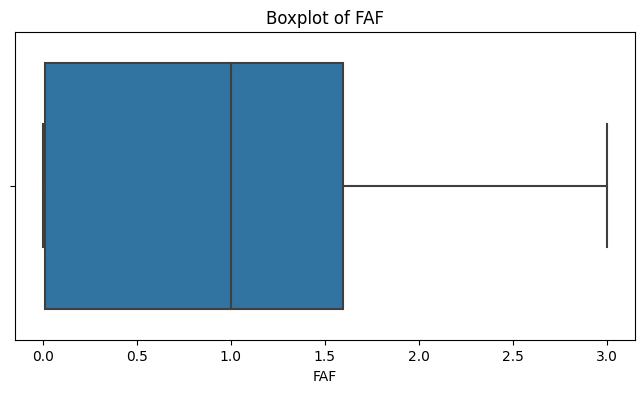

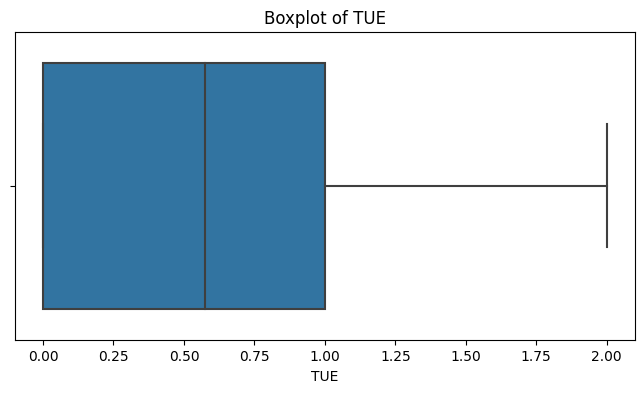

In [9]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipykernel_47/122041714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corr_df[col].fillna(corr_df[col].median(), inplace=True)


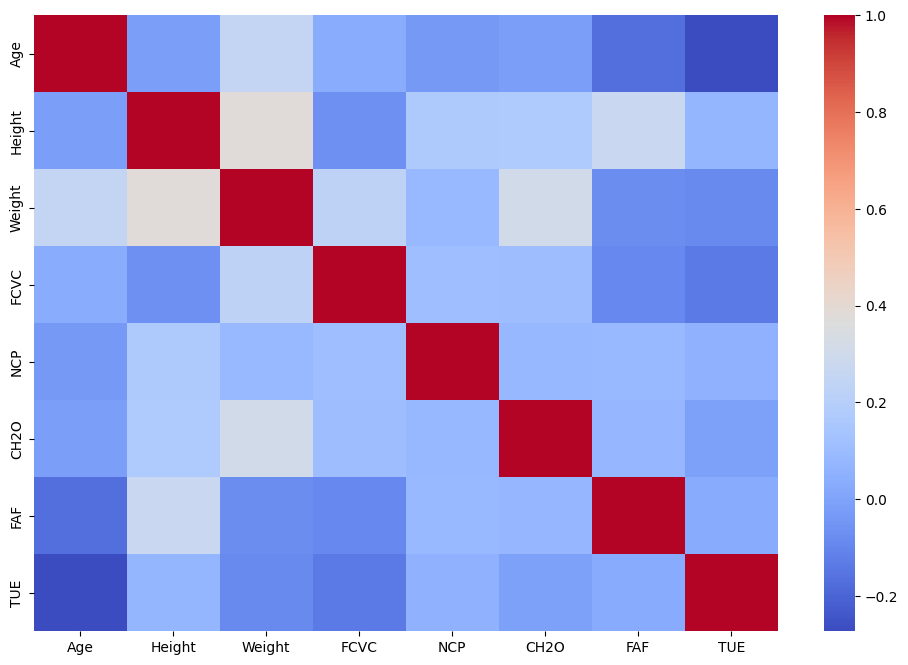

In [10]:
corr_df = train[num_cols].copy()
for col in corr_df.columns:
    corr_df[col].fillna(corr_df[col].median(), inplace=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(), cmap='coolwarm')
plt.show()

In [11]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

In [12]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print('Accuracy:', accuracy_score(y_valid, preds))
print(classification_report(y_valid, preds))

Accuracy: 0.866193336974331
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.89      0.89       468
      Normal_Weight       0.78      0.84      0.81       540
     Obesity_Type_I       0.87      0.86      0.86       535
    Obesity_Type_II       0.94      0.94      0.94       536
   Obesity_Type_III       0.98      1.00      0.99       658
 Overweight_Level_I       0.81      0.69      0.75       461
Overweight_Level_II       0.74      0.78      0.76       464

           accuracy                           0.87      3662
          macro avg       0.86      0.86      0.86      3662
       weighted avg       0.87      0.87      0.87      3662



In [15]:
param_grid = {
    "clf__n_estimators": [200, 300, 500],
    "clf__max_depth": [10, 20, None],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2]
}

grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_model

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [16]:
test_preds = best_model.predict(test)

In [17]:
submission = pd.DataFrame({
    id_col: test_ids,
    target_col: test_preds
})

submission.to_csv('submission.csv', index=False)
print('submission.csv created successfully!')

submission.csv created successfully!
[CV] END clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200; total time=   3.8s
[CV] END clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=500; total time=   7.8s
[CV] END clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=200; total time=   3.3s
[CV] END clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5, clf__n_estimators=300; total time=   4.8s
[CV] END clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200; total time=   3.3s
[CV] END clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200; total time=   3.3s
[CV] END clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=300; total time=   4.6s
[CV] END clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=500; total time=   